在该notebook中，我们探究黑色系板块内相关性。

In [1]:
year_range = [2011, 2021] # 研究的年份区间

%run 库.ipynb  # 包含一切的包

In [2]:
data = quotation.copy()

prodsec = pd.read_excel('CommodityProductsBasicInfo.xls').drop('Unnamed: 7', axis = 1)
# Add new column: sector name
data['sector_name'] = data.product_code.map(dict(prodsec[['product_code', 'sector_name_eng']].values))
# Remove rows with no sector name label
data = data[-data['sector_name'].isnull()]
# Add new column: year
data['year'] = data['trade_date'].dt.year
# Add new column: month
data['month'] = data['trade_date'].dt.month
# Add new column: day
data['day'] = data['trade_date'].dt.day
# Add new column: TR (true range)
data['TR'] = np.amax([data.high - data.low, 
                      abs(data.high - data.pre_close), 
                      abs(data.low - data.pre_close)], 
                     axis = 0)
# Add new column: MATR (monthly averaged true range)
data['MATR'] = data.groupby(['product_code', 'year', 'month']) \
    .apply(lambda x: x.TR.rolling(x.shape[0]).sum()/x.shape[0]).values
data_monthly = data.dropna(axis = 0, subset = ['MATR'])

In [3]:
# Dark
dk = data[data.sector_name == 'Dark']
dk['log_Open'] = np.log(dk.open)

# 价格

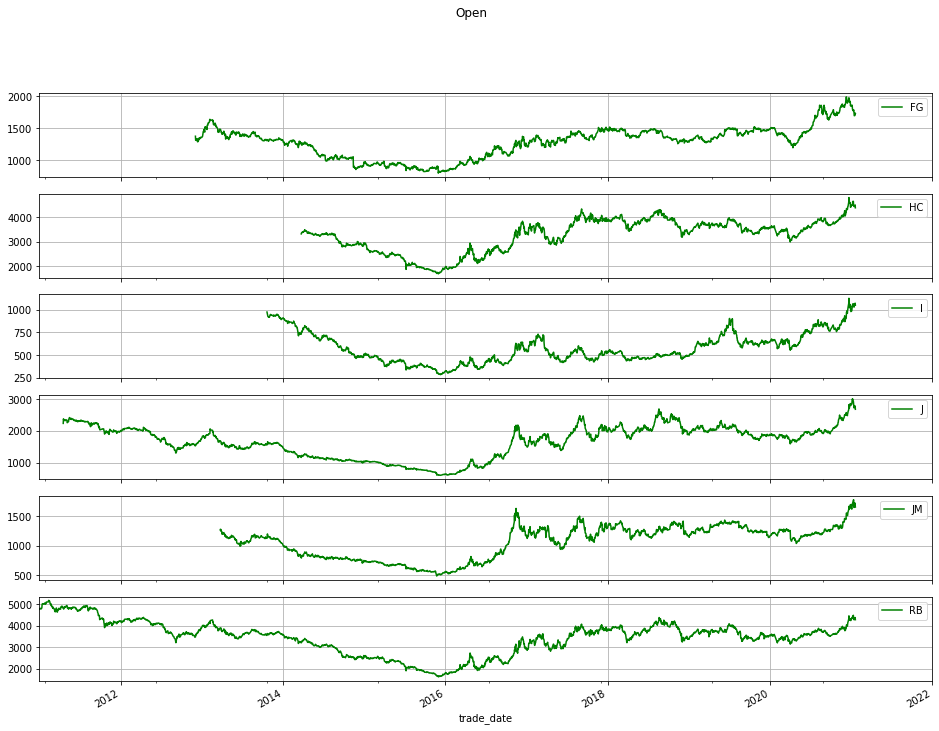

In [4]:
# Open vs time

dk.pivot(index='trade_date', columns='product_code', values='open') \
    .plot(figsize = (16, 2*dk.product_code.unique().shape[0]), 
          color = 'g', subplots = True, grid = True, 
          xlim = ('2011', '2022'), title = 'Open');

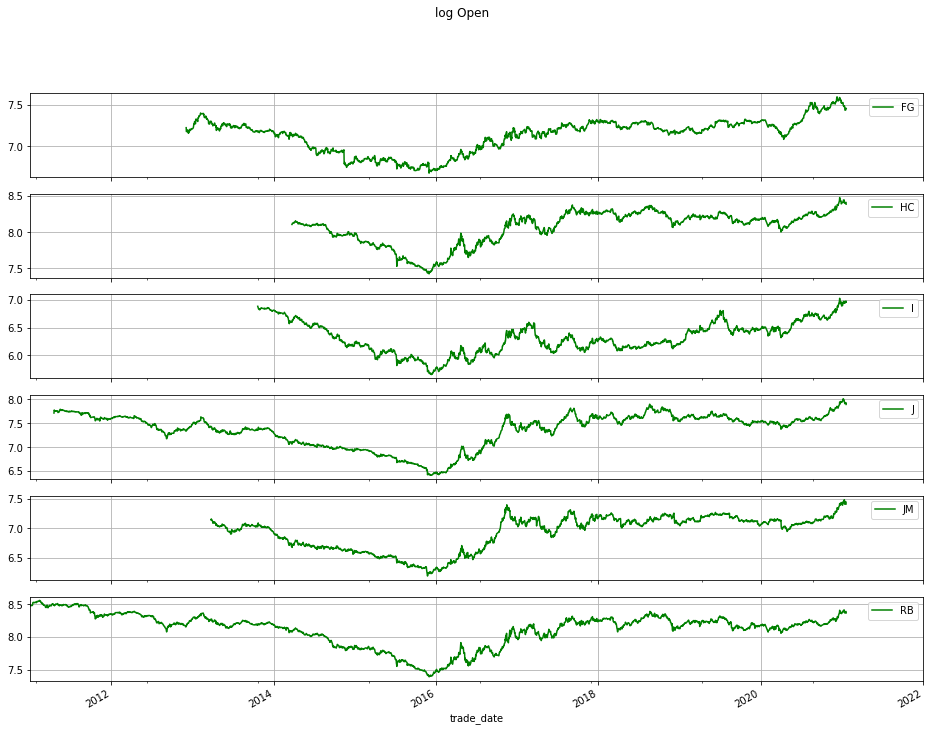

In [5]:
# log_Open vs time

dk.pivot(index='trade_date', columns='product_code', values='log_Open') \
    .plot(figsize = (16, 2*dk.product_code.unique().shape[0]), 
          color = 'g', subplots = True, grid = True, 
          xlim = ('2011', '2022'), title = 'log Open');

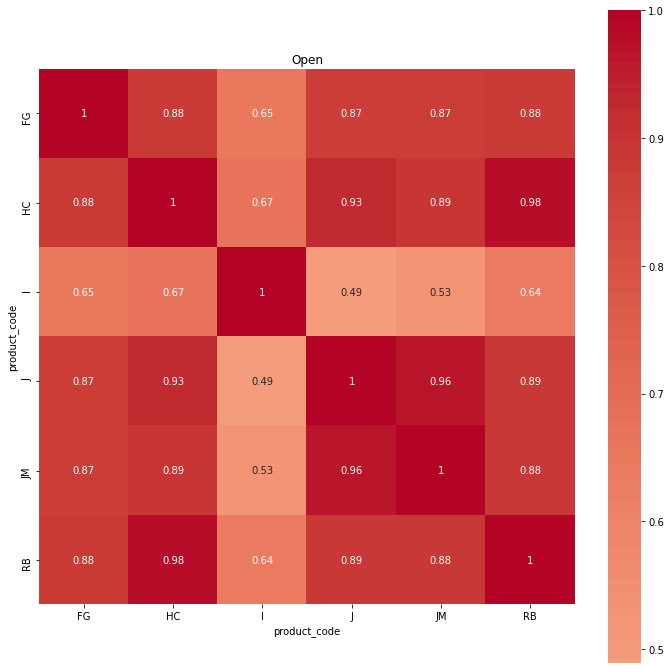

In [6]:
# Open correlation heat map

corr_dk = dk.pivot(index = 'trade_date', columns = 'product_code', values = 'open').corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_dk, cmap = "coolwarm", center = 0, 
            square = True, annot = True).set(title = 'Open');

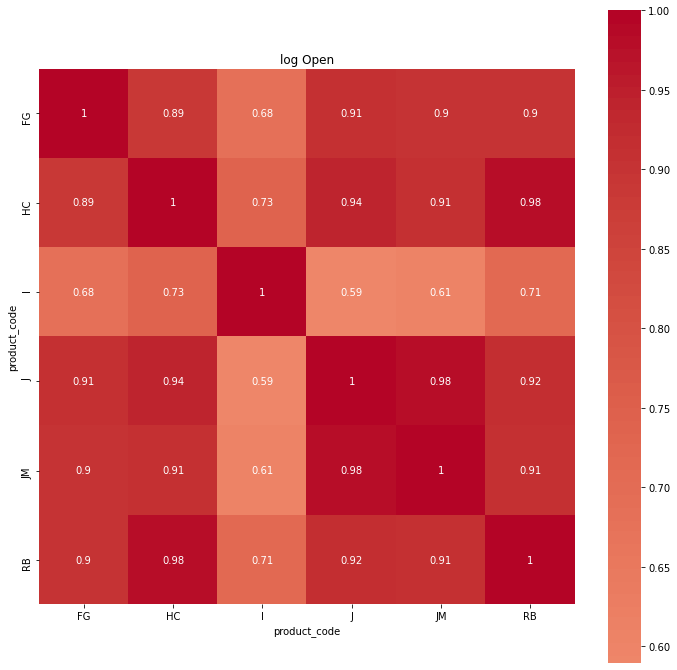

In [7]:
# log_Open correlation heat map

corr_dk = dk.pivot(index = 'trade_date', columns = 'product_code', values = 'log_Open').corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_dk, cmap = "coolwarm", center = 0, 
            square = True, annot = True).set(title = 'log Open');

`log Open`在黑色系板块不同品种间的相关性高于`Open`。

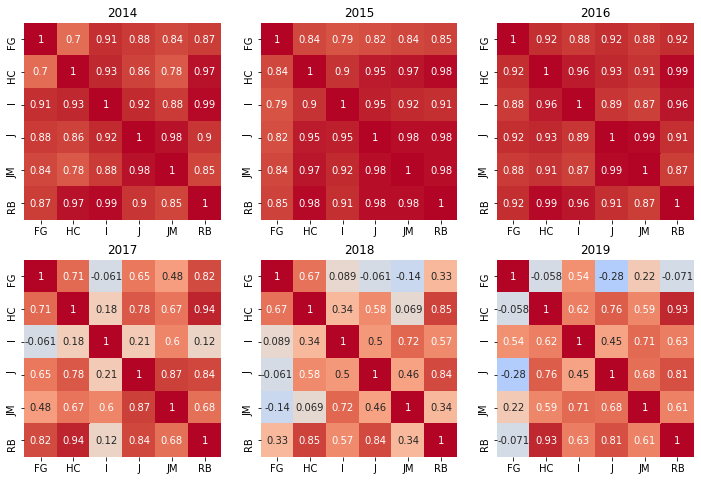

In [8]:
# log_Open correlation heat map by year

plt.figure(figsize=(12,8))

for i in range(2014, 2020):
    plt.subplot(2,3,i-2013)
    m = dk[dk.year == i]. \
        pivot(index = 'trade_date', columns = 'product_code', values = 'log_Open').corr()
    sns.heatmap(m, cmap = "coolwarm", center = 0, annot=True, 
                square = True, cbar = False).set(title = i, xlabel = '', ylabel = '');

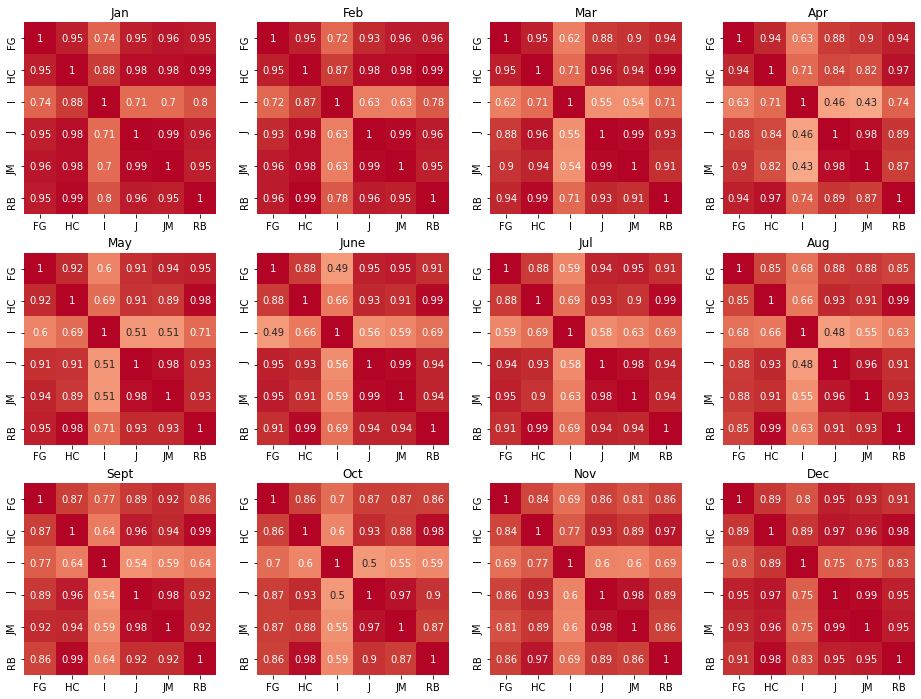

In [9]:
# log_Open correlation heat map by month

plt.figure(figsize=(16,12))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
          'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

for i in range(1, 13):
    plt.subplot(3,4,i)
    m = dk[dk.month == i]. \
        pivot(index = 'trade_date', columns = 'product_code', values = 'log_Open').corr()
    sns.heatmap(m, cmap = "coolwarm", center = 0, annot=True, 
                square = True, cbar = False).set(title = months[i-1], xlabel = '', ylabel = '');

# MATR (Monthly Average True Range)

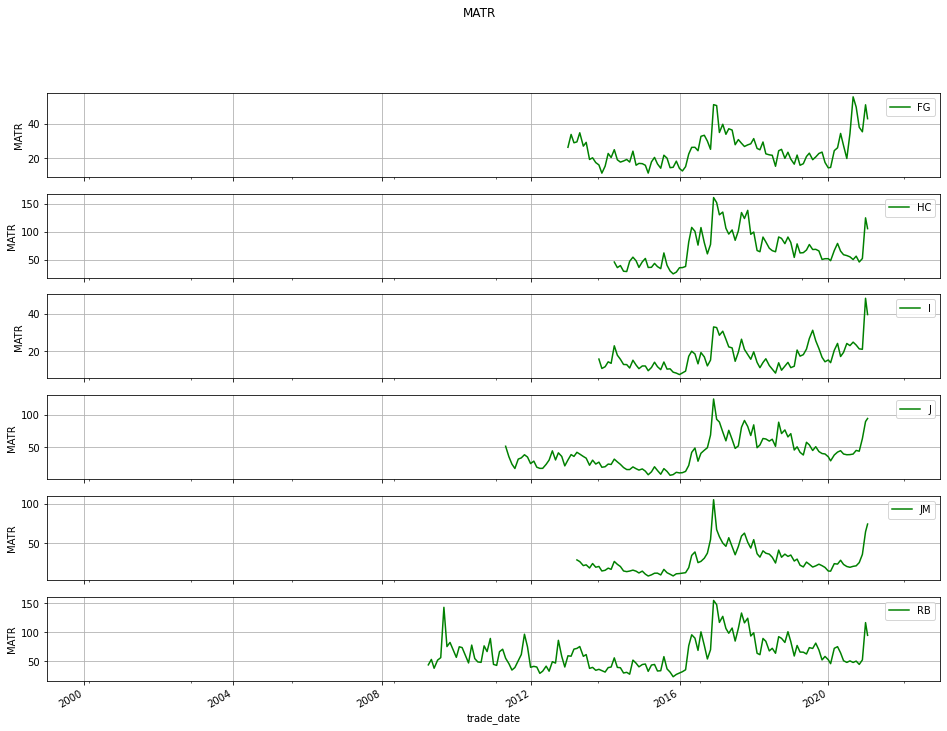

In [10]:
# MATR vs time

month_dk = data_monthly[data_monthly.sector_name == 'Dark']

month_dk.pivot(index='trade_date', columns='product_code', values='MATR') \
    .plot(figsize = (16, 2*month_dk.product_code.unique().shape[0]), 
          color = 'g', subplots = True, grid = True, 
          ylabel = 'MATR', xlim = ('1999', '2023'), title = 'MATR');

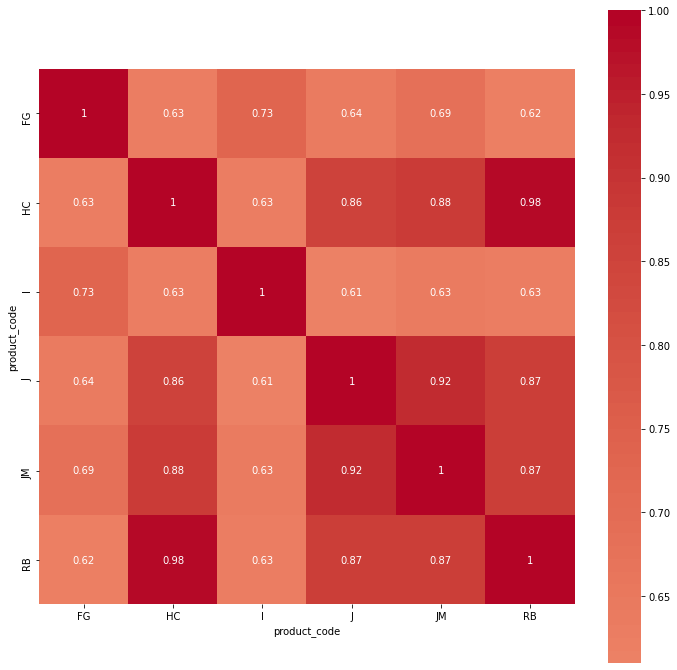

In [11]:
# MATR correlation heat map

corr_month_dk = month_dk.pivot(index = 'trade_date', columns = 'product_code', values = 'MATR').corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_month_dk, cmap = "coolwarm", center = 0, 
            square = True, annot = True);

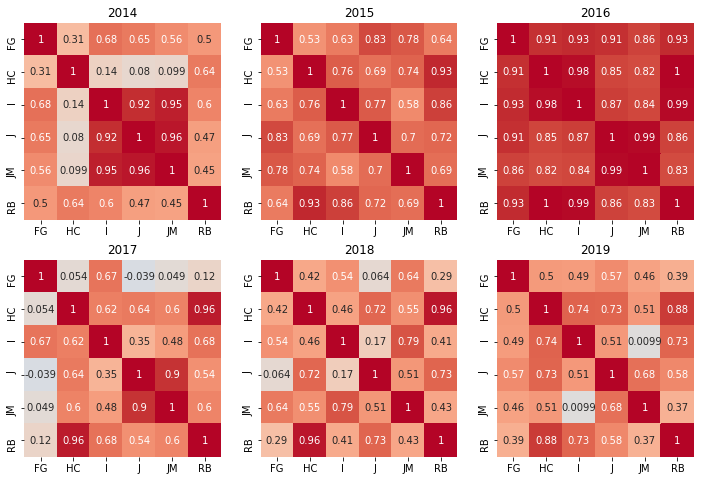

In [12]:
# MATR correlation heat map by year

plt.figure(figsize=(12,8))

for i in range(2014, 2020):
    plt.subplot(2,3,i-2013)
    m = month_dk[month_dk.year == i]. \
        pivot(index = 'trade_date', columns = 'product_code', values = 'MATR').corr()
    sns.heatmap(m, cmap = "coolwarm", center = 0, annot=True, 
                square = True, cbar = False).set(title = i, xlabel = '', ylabel = '');

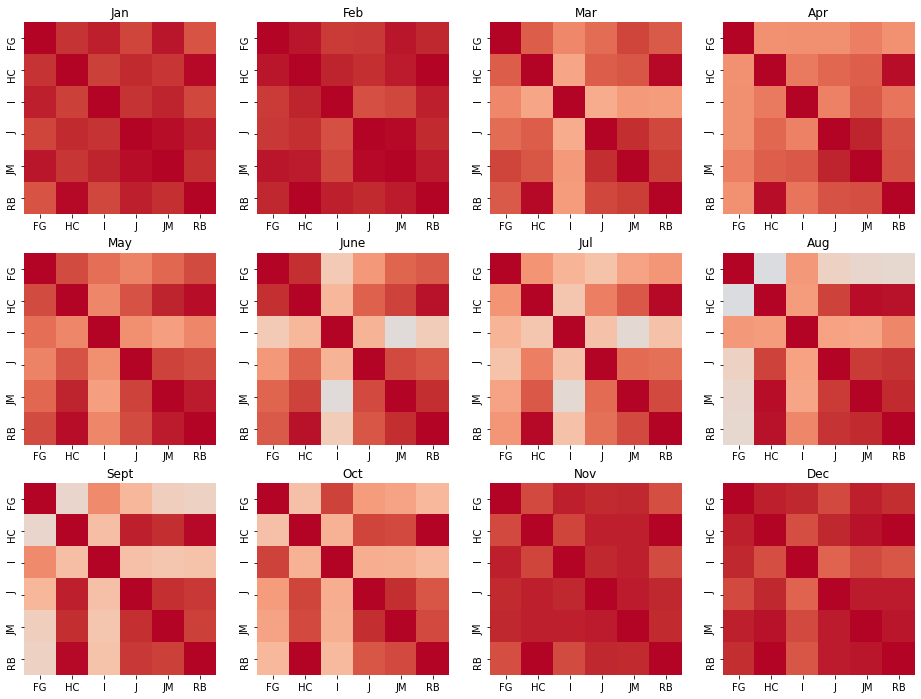

In [13]:
# MATR correlation heat map by month

plt.figure(figsize=(16,12))

for i in range(1, 13):
    plt.subplot(3,4,i)
    m = month_dk[month_dk.month == i]. \
        pivot(index = 'trade_date', columns = 'product_code', values = 'MATR').corr()
    sns.heatmap(m, cmap = "coolwarm", center = 0,
                square = True, cbar = False).set(title = months[i-1], xlabel = '', ylabel = '');